In [8]:
# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Model evaluation
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_score, recall_score, f1_score

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [9]:
import pandas as pd

# Load CSV from local path
df = pd.read_csv("fraud.csv")

# Shape & preview
print("Shape of dataset:", df.shape)
df.head()

Shape of dataset: (6362620, 11)


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [11]:
# Column names and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [12]:
# Summary statistics
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [13]:
# Check missing values
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [ ]:
#Step 2 – Data Cleaning

In [14]:
# Missing values check
missing = df.isnull().sum()
print("Missing values:\n", missing[missing > 0])

Missing values:
 Series([], dtype: int64)


In [15]:
df = df.drop(['nameOrig', 'nameDest'], axis=1)

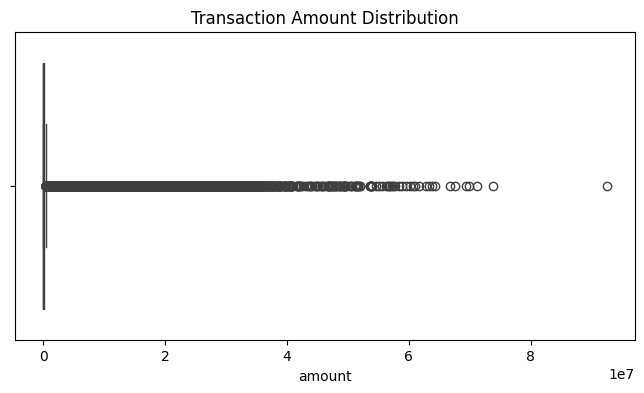

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
sns.boxplot(x=df['amount'])
plt.title("Transaction Amount Distribution")
plt.show()

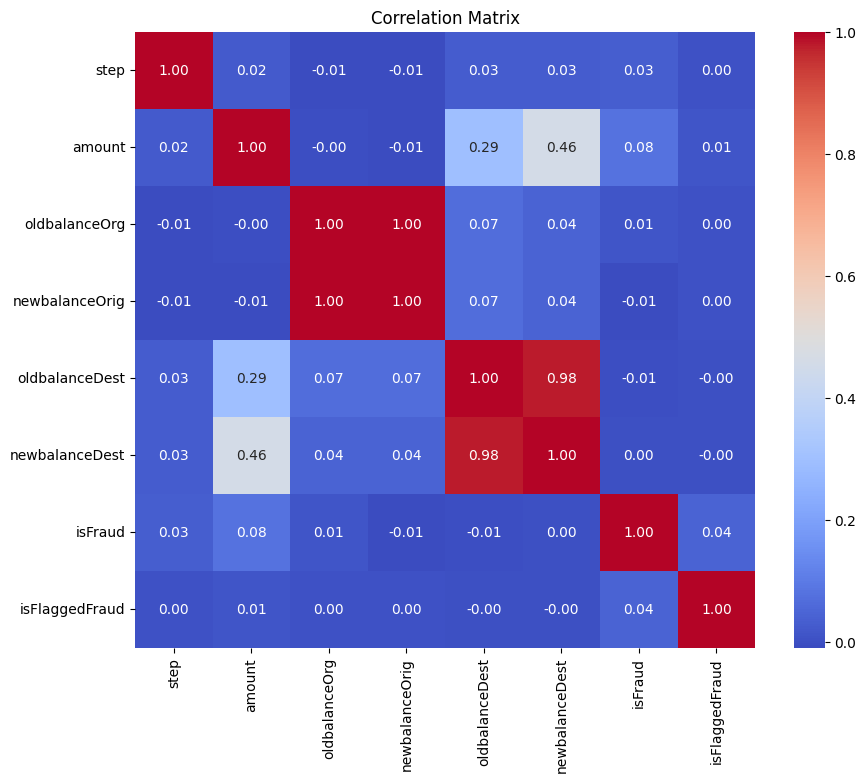

In [18]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])

plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [ ]:
#Step 3 – Feature Engineering

In [19]:
# One-hot encode 'type' column
df = pd.get_dummies(df, columns=['type'], drop_first=True)

In [20]:
# Difference in balance for origin account
df['balanceDiffOrig'] = df['oldbalanceOrg'] - df['newbalanceOrig'] - df['amount']

# Difference in balance for destination account
df['balanceDiffDest'] = df['newbalanceDest'] - df['oldbalanceDest'] - df['amount']

In [21]:
# Define target and features
X = df.drop(['isFraud', 'isFlaggedFraud'], axis=1)
y = df['isFraud']

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [ ]:
#Step 4 – Model Building

In [24]:
from sklearn.linear_model import LogisticRegression

# Create and train Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
log_reg.fit(X_train, y_train)

# Predictions
y_pred_lr = log_reg.predict(X_test)
y_proba_lr = log_reg.predict_proba(X_test)[:,1]

In [25]:
from sklearn.ensemble import RandomForestClassifier

# Create and train Random Forest model
rf_clf = RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)
rf_clf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_clf.predict(X_test)
y_proba_rf = rf_clf.predict_proba(X_test)[:,1]

In [26]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

def evaluate_model(y_true, y_pred, y_proba):
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("\nClassification Report:\n", classification_report(y_true, y_pred))
    print("ROC-AUC Score:", roc_auc_score(y_true, y_proba))

In [27]:
print("=== Logistic Regression ===")
evaluate_model(y_test, y_pred_lr, y_proba_lr)

print("\n=== Random Forest ===")
evaluate_model(y_test, y_pred_rf, y_proba_rf)

=== Logistic Regression ===
Confusion Matrix:
 [[1832991   73331]
 [    208    2256]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98   1906322
           1       0.03      0.92      0.06      2464

    accuracy                           0.96   1908786
   macro avg       0.51      0.94      0.52   1908786
weighted avg       1.00      0.96      0.98   1908786

ROC-AUC Score: 0.9852189035096373

=== Random Forest ===
Confusion Matrix:
 [[1906322       0]
 [      9    2455]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906322
           1       1.00      1.00      1.00      2464

    accuracy                           1.00   1908786
   macro avg       1.00      1.00      1.00   1908786
weighted avg       1.00      1.00      1.00   1908786

ROC-AUC Score: 0.9981725852028963


In [ ]:
#Step 5 – Feature Importance

            Feature  Importance
10  balanceDiffOrig    0.404533
3    newbalanceOrig    0.147893
2     oldbalanceOrg    0.135707
1            amount    0.097741
9     type_TRANSFER    0.046740
8      type_PAYMENT    0.045155
0              step    0.032002
11  balanceDiffDest    0.029793
5    newbalanceDest    0.023034
6     type_CASH_OUT    0.021934


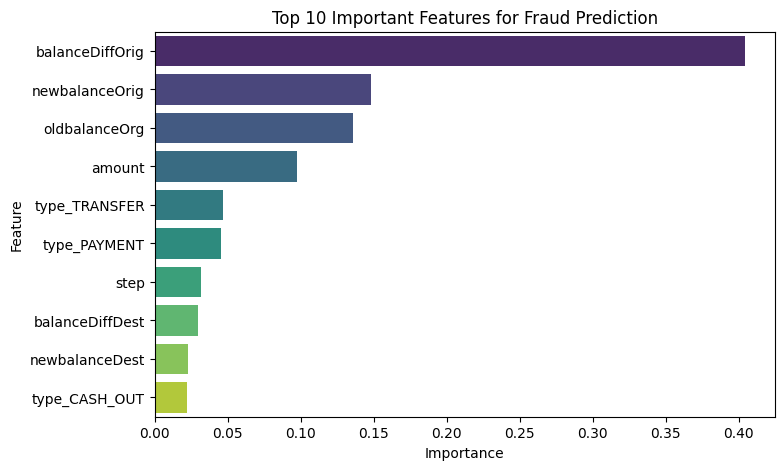

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importances from Random Forest
importances = rf_clf.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for better visualization
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Display top 10 features
print(feat_imp_df.head(10))

# Plot top 10 features
plt.figure(figsize=(8,5))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df.head(10), palette='viridis')
plt.title('Top 10 Important Features for Fraud Prediction')
plt.show()

In [29]:
print("✅ Insights and Recommendations:")
print("\nKey Fraud Predictors:", feat_imp_df.head(5)['Feature'].tolist())
print("\nThese predictors make sense because they reflect high-risk behaviors (large transfers, cash-outs, abnormal balance changes).")
print("\nRecommended Actions:")
print("1. Real-time monitoring of high-value transfers and cash-outs.")
print("2. Set transaction velocity limits.")
print("3. Trigger alerts for sudden balance drops.")
print("4. Validate suspicious destination accounts.")

print("\nMeasuring Effectiveness:")
print("- Track fraud rate reduction.")
print("- Monitor false positive rate.")
print("- Gather customer feedback.")
print("- Measure reduction in monetary loss.")

✅ Insights and Recommendations:

Key Fraud Predictors: ['balanceDiffOrig', 'newbalanceOrig', 'oldbalanceOrg', 'amount', 'type_TRANSFER']

These predictors make sense because they reflect high-risk behaviors (large transfers, cash-outs, abnormal balance changes).

Recommended Actions:
1. Real-time monitoring of high-value transfers and cash-outs.
2. Set transaction velocity limits.
3. Trigger alerts for sudden balance drops.
4. Validate suspicious destination accounts.

Measuring Effectiveness:
- Track fraud rate reduction.
- Monitor false positive rate.
- Gather customer feedback.
- Measure reduction in monetary loss.
